In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [47]:
from tqdm.notebook import tqdm

In [2]:
from config import *

from easyric.caas_lite import TiffSpliter
from easyric.objects import Pix4D
from easyric.io import shp, geotiff, plot
from easyric.calculate import geo2raw, geo2tiff

import os
import shapefile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shapely
import tifffile



In [8]:
root = r"Y:\hwang_Pro\data\2020_tanashi_broccoli\13_roi_on_raw"

In [49]:
def read_json(json_path):
    br_container = []
    bg_container = []
    with open(json_path, "r", encoding="utf-8") as f:
        js = json.loads(f.read())
        img_path = os.path.join(root, js["imagePath"][3:])
        for item in js["shapes"]:
            points = np.asarray(item["points"])
            points = np.append(points, points[0,:][None,:], axis=0)
            if item["label"] == "broccoli":
                br_container.append(points)
            elif item["label"] == "bg":
                bg_container.append(points)
            else:
                raise ValueError(f"Can not distinguish [{item['label']}]")
    return br_container, bg_container, img_path

In [18]:
br, bg, imgPath = read_json(os.path.join(root, "train", "labeled_v4_20200526_207_DJI_0852.json"))

\broccoli_tanashi_5_20200526_P4M_10m_after\207_DJI_0852.JPG


In [19]:
imgPath

'Y:\\hwang_Pro\\data\\2020_tanashi_broccoli\\13_roi_on_raw\\broccoli_tanashi_5_20200526_P4M_10m_after\\207_DJI_0852.JPG'

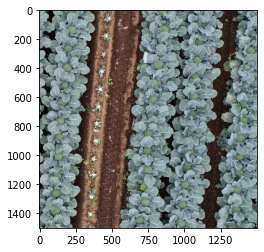

In [21]:
plt.imshow(plt.imread(imgPath))

### draw figures

In [22]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

<ipython-input-28-8b0000a3a376>:5: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = Polygon(p, color="r", alpha=0.5, hatch="o", edgecolor="r")


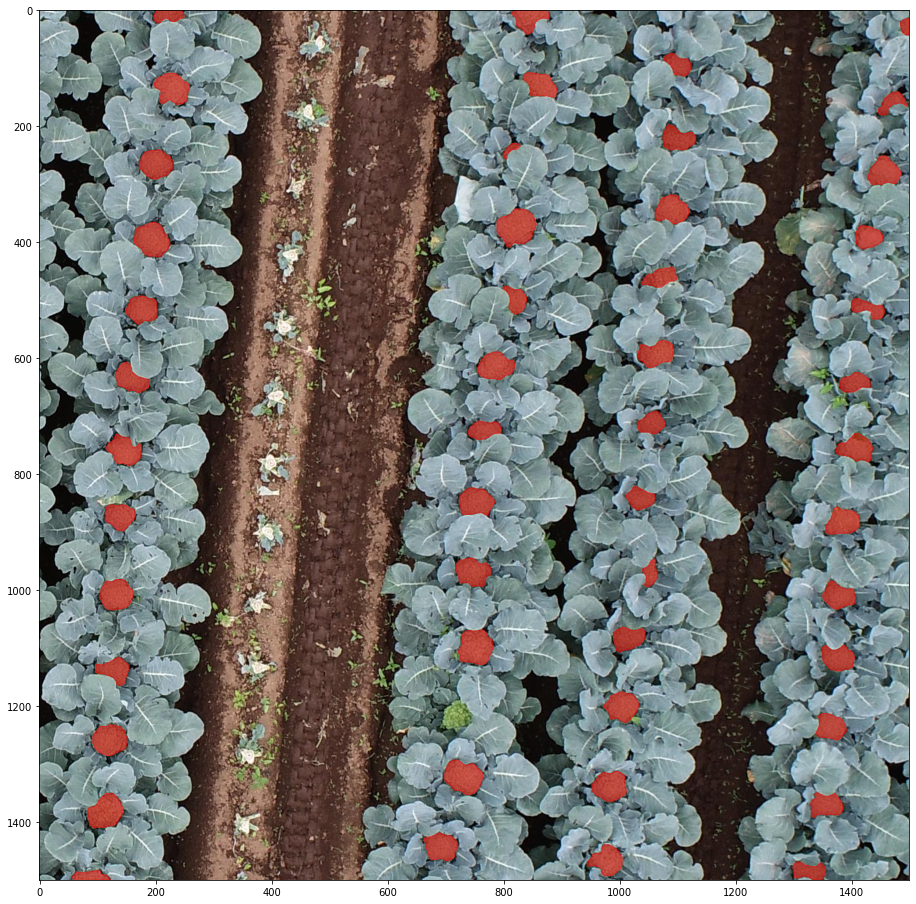

In [28]:
plt.imshow(plt.imread(imgPath))

patches = []
for p in br:
    polygon = Polygon(p, color="r", alpha=0.5, hatch="o")
    patches.append(polygon)
    
p = PatchCollection(patches, match_original=True)
plt.gca().add_collection(p)

plt.gcf().set_size_inches((16, 16))

In [51]:
def plot_json(json_name, show=False):
    aux_name = json_name.replace("labeled","aux")
    
    aux_br, aux_bg, _ = read_json(os.path.join(root, "aux_backup", aux_name))
    br, bg, imgPath = read_json(os.path.join(root, "train", json_name))
    
    plt.imshow(plt.imread(imgPath))
    
    patches = []
    # original results
    for p in aux_br:
        polygon = Polygon(p, color="r", alpha=0.4, hatch="o")
        patches.append(polygon)
        
    # maual fixed
    for p in br:
        plt.plot(*p.T, "b-")
        
    for p in bg:
        plt.plot(*p.T, "g-")

    p = PatchCollection(patches, match_original=True)
    plt.gca().add_collection(p)

    plt.gcf().set_size_inches((16, 16))
    
    plt.axis("off")
    plt.tight_layout()
    plt.savefig("label_check/" + json_name[:-4]+".png")
    
    if show:
        plt.show()
    
    plt.clf()
    plt.cla()

/broccoli_tanashi_5_20200520_P4M_10m/294_DJI_0717.JPG
\broccoli_tanashi_5_20200520_P4M_10m\294_DJI_0717.JPG


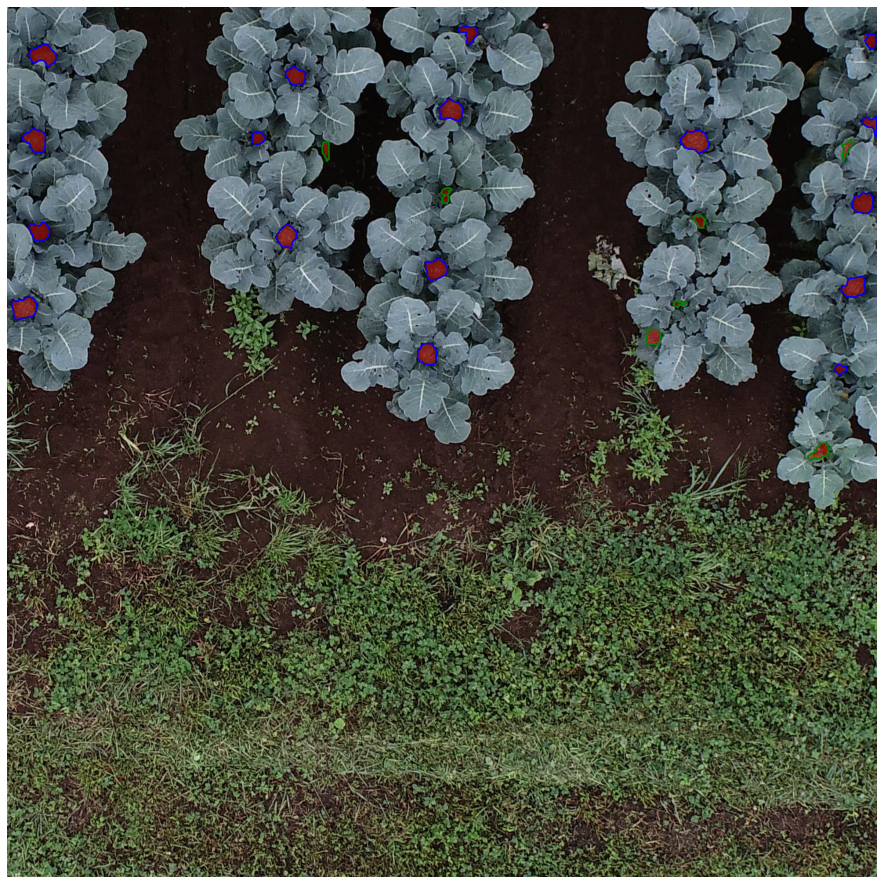

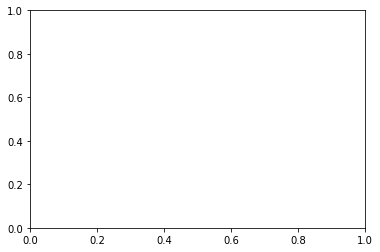

In [45]:
plot_json("labeled_v4_20200520_294_DJI_0717.json", True)

  0%|          | 0/41 [00:00<?, ?it/s]

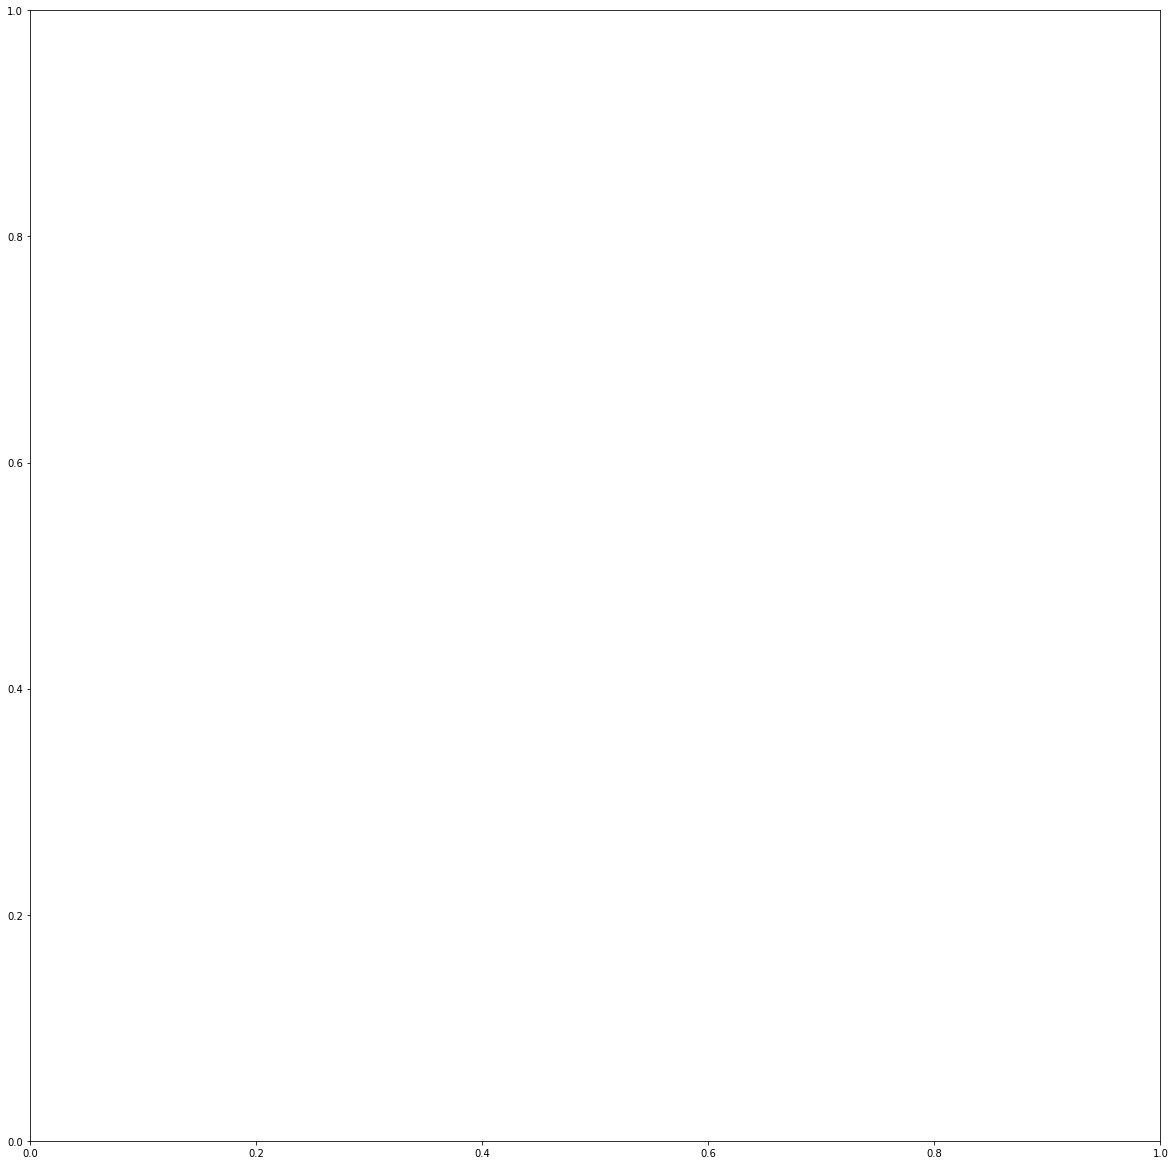

In [52]:
for j in tqdm(os.listdir(f"{root}/train")[6:]):
    plot_json(j)